In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load all CSV files from the data/ folder
train_df = pd.read_csv('../data/training.csv')
val_df = pd.read_csv('../data/validation.csv')
test_df = pd.read_csv('../data/test.csv')


In [5]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [6]:
print("\nValidation:")
print(val_df.head())


Validation:
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1


In [7]:
print("\nTest:")
print(test_df.head())


Test:
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


C:\Users\shrey\AppData\Local\Temp\ipykernel_11716\2188943987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='Set2')


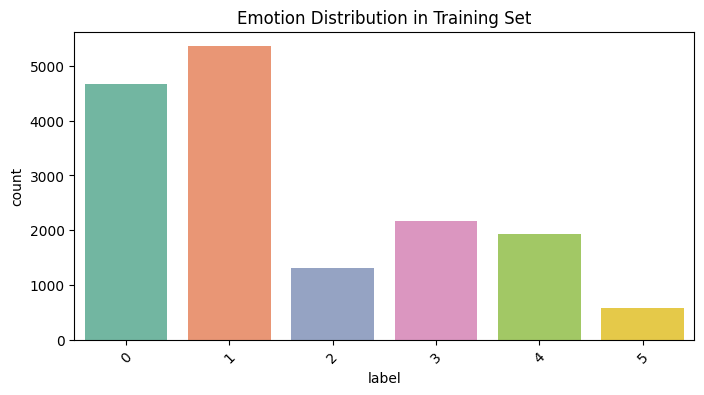

In [8]:
# Optional: Plot
plt.figure(figsize=(8,4))
sns.countplot(data=train_df, x='label', palette='Set2')
plt.title("Emotion Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Check missing values in all datasets
print("Training missing values:\n", train_df.isnull().sum())
print("\nValidation missing values:\n", val_df.isnull().sum())
print("\nTest missing values:\n", test_df.isnull().sum())


Training missing values:
 text     0
label    0
dtype: int64

Validation missing values:
 text     0
label    0
dtype: int64

Test missing values:
 text     0
label    0
dtype: int64


In [10]:
# Drop rows with any NaN in them
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)
test_df.dropna(inplace=True)


In [11]:
# Confirm no NaNs remain
print("Remaining NaNs in training set:", train_df.isnull().sum().sum())
print("Remaining NaNs in validation set:", val_df.isnull().sum().sum())
print("Remaining NaNs in test set:", test_df.isnull().sum().sum())


Remaining NaNs in training set: 0
Remaining NaNs in validation set: 0
Remaining NaNs in test set: 0


In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def clean_text(text):
    text = text.lower()                                 # lowercase
    text = re.sub(r'[^a-z\s]', '', text)                # remove punctuation and numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text


In [14]:
train_df['text'] = train_df['text'].apply(clean_text)
val_df['text'] = val_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)


In [15]:
train_df.head()


,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create encoder object
le = LabelEncoder()

# Fit on training labels, transform all sets
train_df['label_encoded'] = le.fit_transform(train_df['label'])
val_df['label_encoded'] = le.transform(val_df['label'])
test_df['label_encoded'] = le.transform(test_df['label'])


In [17]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5)}


In [18]:
{'anger': 0, 'happy': 1, 'sad': 2}


{'anger': 0, 'happy': 1, 'sad': 2}

In [19]:
print("Emotion Labels and Counts:\n")
print(train_df['label'].value_counts())


Emotion Labels and Counts:

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


In [20]:
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5)}


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can tune this

# Fit on training text and transform all sets
X_train = vectorizer.fit_transform(train_df['text'])
X_val   = vectorizer.transform(val_df['text'])
X_test  = vectorizer.transform(test_df['text'])

# Targets
y_train = train_df['label_encoded']
y_val   = val_df['label_encoded']
y_test  = test_df['label_encoded']


In [22]:
print("Shape of TF-IDF matrix:", X_train.shape)
print("Feature names sample:", vectorizer.get_feature_names_out()[:10])


Shape of TF-IDF matrix: (16000, 5000)
Feature names sample: ['aa' 'abandon' 'abandoned' 'abandonment' 'abc' 'abdomen' 'abilities'
 'ability' 'abit' 'able']


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize SVM (you can tune C, kernel later)
svm_clf = SVC(kernel='linear', C=1.0)

# Train
svm_clf.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
target_labels = sorted(train_df['label'].unique())


In [27]:
target_labels = [str(label) for label in le.classes_]


In [28]:
print("\nClassification Report:\n", classification_report(y_val, val_preds, target_names=target_labels))



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       550
           1       0.90      0.93      0.91       704
           2       0.85      0.77      0.81       178
           3       0.90      0.88      0.89       275
           4       0.82      0.81      0.81       212
           5       0.87      0.74      0.80        81

    accuracy                           0.89      2000
   macro avg       0.87      0.84      0.86      2000
weighted avg       0.89      0.89      0.89      2000



Test Set Accuracy: 0.8855

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       581
           1       0.90      0.94      0.91       695
           2       0.79      0.72      0.75       159
           3       0.88      0.88      0.88       275
           4       0.86      0.86      0.86       224
           5       0.75      0.62      0.68        66

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.88      0.89      0.88      2000



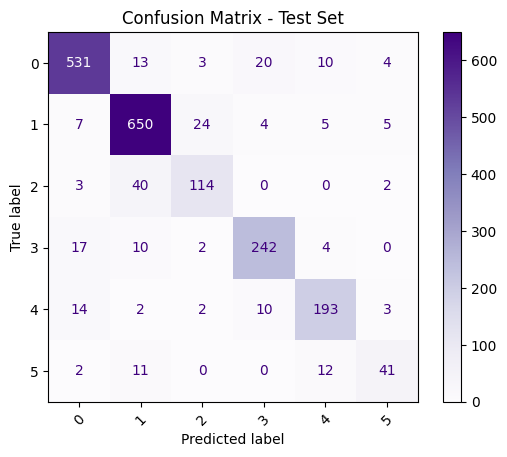

In [29]:
# Predict on test set
test_preds = svm_clf.predict(X_test)

# Accuracy
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Test Set Accuracy:", accuracy_score(y_test, test_preds))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, test_preds, target_names=target_labels))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_labels)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Test Set")
plt.xticks(rotation=45)
plt.show()


In [31]:
import pickle

# Save model and vectorizer
with open('../app/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_clf, f)

with open('../app/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


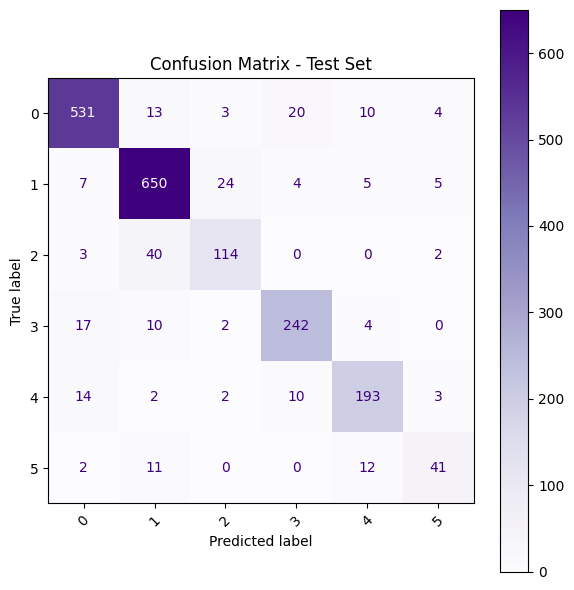

In [32]:
# Save confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_labels)
disp.plot(ax=ax, cmap='Purples')
plt.title("Confusion Matrix - Test Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/test_confusion_matrix.png')
